<a href="https://colab.research.google.com/github/ArjavMehta01/Truist-Credit_Risk_SAS/blob/Nishang/quarterly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Control m m will convert a code cell to a text cell. Control m y will convert a text cell to a code cell.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Create 6 dates 
##df = pd.DataFrame() 
np.random.seed(23)
df = pd.DataFrame({'variable': np.random.random_integers(low=1,high=10,size=6),'Cur_stat': ['a', 'a', 'b','a','b','b'], 'Next_stat': [ 'a','b','b','b','c','c'], 'Loan_id': [1, 1, 1,2,2,2]})
df['time'] = pd.date_range('8/1/2019', periods = 3, freq ='M').append(pd.date_range('8/1/2019', periods = 3, freq ='M') )
df.iloc[3,0]=3
print(df)
##df.nunique()


# cur dataset
cur = df[df['Cur_stat']=="a"]
def c_p(n_s):
  if n_s=="b": return 1
  else: return 0 
cur['p']= cur.apply(lambda x: c_p(cur['Next_stat']),axis=1)
cur['flag']= cur['Next_stat'].apply(lambda x: x>5)
print(cur)


sns.set()  # use Seaborn styles
cur.pivot_table('p', index='time', columns='flag', aggfunc='average').plot()
plt.ylabel('Probability of Default');

#jumbo
mask = cur['variable'] >= 5
jumbo = cur[mask]
nonjumbo = cur[~mask]
j_plot =jumbo.groupby(['time','Next_stat']).size().unstack()
n_plot =nonjumbo.groupby(['time','Next_stat']).size().unstack()
j_plot=j_plot.replace(np.nan,0)
print(j_plot)
print(n_plot)

j_plot['d_rate']= j_plot['b']/(j_plot['a']+j_plot['b'])

print(j_plot)
#n_plot['d_rate']= n_plot['b']/(n_plot['a']+n_plot['b'])
#print(n_plot)

plt.plot( 'time', 'd_rate', data=j_plot, marker='', color='olive', linewidth=2, linestyle='dashed', label="jumbo")
plt.legend()


#df.nunique(1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cur = pd.read_csv('/content/drive/My Drive/summer project/Copy of cur.csv')


In [ ]:
cur.head()

,Loan_id,Orig_amt,Orig_dte,Oltv,Dti,Cscore_b,Act_date,Curr_rte,Act_upb,Loan_age,Curr_stat,Next_stat,Final_stat,fico,orig_hpi,Rate,Rate_MDT,TNF_MDT,GDP,GDP_MDT,HS,HS_MDT,UMP,UMP_MDT,PPI,PPI_MDT,Permits,HOP_MDT,Payroll,HPI,CLTV
0,196441277123,336000,01/01/06,56,37.0,661.0,01/01/06,6.60,NaN,-1,CUR,CUR,PPY,Sub-Prime,182.325,6.145,-0.058,156,13603.933,0.0,2273,-153,4.7,-0.1,164.3,-0.7,2212,-98,135429,182.325,56.0
1,205685348267,203000,01/01/06,78,54.0,807.0,01/01/06,6.65,NaN,-1,CUR,CUR,SDQ,Prime,182.325,6.145,-0.058,156,13603.933,0.0,2273,-153,4.7,-0.1,164.3,-0.7,2212,-98,135429,182.325,78.0
2,225804687634,63000,01/01/06,15,25.0,809.0,01/01/06,6.85,NaN,0,CUR,CUR,PPY,Prime,182.325,6.145,-0.058,156,13603.933,0.0,2273,-153,4.7,-0.1,164.3,-0.7,2212,-98,135429,182.325,15.0
3,330090408408,417000,01/01/06,70,39.0,654.0,01/01/06,6.60,NaN,-1,CUR,CUR,SDQ,Sub-Prime,182.325,6.145,-0.058,156,13603.933,0.0,2273,-153,4.7,-0.1,164.3,-0.7,2212,-98,135429,182.325,70.0
4,462713800974,50000,01/01/06,8,45.0,795.0,01/01/06,6.65,NaN,-1,CUR,CUR,CUR,Prime,182.325,6.145,-0.058,156,13603.933,0.0,2273,-153,4.7,-0.1,164.3,-0.7,2212,-98,135429,182.325,8.0


In [ ]:
de = pd.read_csv('/content/drive/My Drive/summer project/Copy of del.csv')
de.head()

,Loan_id,Orig_amt,Orig_dte,Oltv,Dti,Cscore_b,Act_date,Curr_rte,Act_upb,Loan_age,Curr_stat,Next_stat,Final_stat,fico,orig_hpi,Rate,Rate_MDT,TNF_MDT,GDP,GDP_MDT,HS,HS_MDT,UMP,UMP_MDT,PPI,PPI_MDT,Permits,HOP_MDT,Payroll,HPI,CLTV
0,554812224181,188000,01/01/06,36,31.0,678.0,03/01/06,6.125,NaN,1,DEL,CUR,PPY,Prime,182.325,6.3240,0.1075,308,13603.933,0.000,1969,-154,4.7,0.1,162.2,-2.5,2118,-71,136047,184.370,36.000000
1,183620939044,80000,01/01/06,62,31.0,641.0,05/01/06,6.750,NaN,3,DEL,DEL,DEL,Sub-Prime,182.325,6.5975,0.1835,158,13749.806,145.873,1942,-148,4.6,0.0,165.8,2.1,1905,-120,136244,184.158,62.000000
2,953619041053,216000,02/01/06,80,31.0,709.0,06/01/06,6.125,NaN,3,DEL,CUR,PPY,Prime,183.292,6.6820,0.0900,39,13749.806,0.000,1802,121,4.6,-0.1,166.1,1.5,1867,-93,136325,183.511,80.000000
3,183620939044,80000,01/01/06,62,31.0,641.0,08/01/06,6.750,79605.91,6,DEL,DEL,DEL,Sub-Prime,182.325,6.5240,0.0805,195,13867.469,117.663,1650,-65,4.7,0.1,167.9,0.7,1722,-104,136694,182.602,61.600992
4,450195474318,398000,01/01/06,80,51.0,768.0,08/01/06,5.750,392316.45,6,DEL,CUR,PPY,Prime,182.325,6.5240,0.0805,195,13867.469,117.663,1650,-65,4.7,0.1,167.9,0.7,1722,-104,136694,182.602,78.737954


count    2.995198e+06
mean     2.220892e+05
std      1.194941e+05
min      1.000000e+04
25%      1.320000e+05
50%      1.980000e+05
75%      2.920000e+05
max      1.250000e+06
Name: Orig_amt, dtype: float64


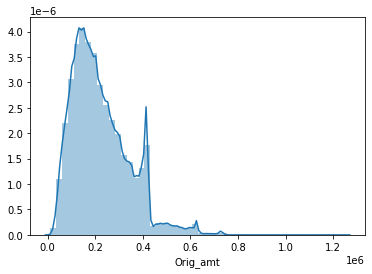

In [ ]:
x = cur['Orig_amt']
print(x.describe())
sns.distplot(x)


count     16244.000000
mean     202314.454568
std      106390.037025
min       12000.000000
25%      123000.000000
50%      182000.000000
75%      264000.000000
max      730000.000000
Name: Orig_amt, dtype: float64


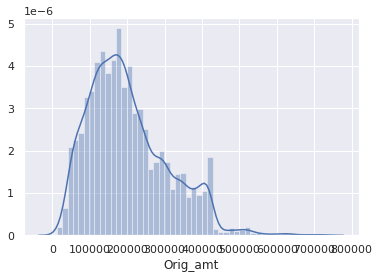

In [ ]:
x2 = de['Orig_amt']
print(x2.describe())
sns.distplot(x2)


In [ ]:
Next_stat =cur.Next_stat
Next_stat2 =de.Next_stat

In [ ]:
# use p,P2 to calculate the P(DEL),P(SDQ)
cur['p']= Next_stat.apply(lambda x: x=="DEL")
print(cur,'/n')
cur['p'] = cur['p']*1
print(cur)

              Loan_id  Orig_amt  Orig_dte  ...      HPI       CLTV      p
0        196441277123    336000  01/01/06  ...  182.325  56.000000  False
1        205685348267    203000  01/01/06  ...  182.325  78.000000  False
2        225804687634     63000  01/01/06  ...  182.325  15.000000  False
3        330090408408    417000  01/01/06  ...  182.325  70.000000  False
4        462713800974     50000  01/01/06  ...  182.325   8.000000  False
...               ...       ...       ...  ...      ...        ...    ...
2995193  996476110253    143000  10/01/17  ...  212.663  83.785332  False
2995194  996610201482    290000  10/01/17  ...  212.663  58.160240  False
2995195  996705370944     85000  10/01/17  ...  212.663  48.872424  False
2995196  997162388869    255000  10/01/17  ...  212.663  66.304642  False
2995197  999388385243    424000  10/01/17  ...  212.663  82.990947  False

[2995198 rows x 32 columns] /n
              Loan_id  Orig_amt  Orig_dte  Oltv  ...  Payroll      HPI       CLT

In [ ]:
de['p2']= Next_stat2.apply(lambda x: x=="SDQ")
print(de,'/n')
de['p2'] = de['p2']*1
print(de)

            Loan_id  Orig_amt  Orig_dte  ...      HPI       CLTV     p2
0      554812224181    188000  01/01/06  ...  184.370  36.000000  False
1      183620939044     80000  01/01/06  ...  184.158  62.000000  False
2      953619041053    216000  02/01/06  ...  183.511  80.000000  False
3      183620939044     80000  01/01/06  ...  182.602  61.600992  False
4      450195474318    398000  01/01/06  ...  182.602  78.737954  False
...             ...       ...       ...  ...      ...        ...    ...
16239  878375158839    152000  10/01/17  ...  212.663  70.988773  False
16240  943146056940    147000  10/01/17  ...  212.663  84.261635  False
16241  947249179465    228000  10/01/17  ...  212.663  66.334200  False
16242  958969196463    301000  10/01/17  ...  212.663  62.036175  False
16243  994756141113    500000  10/01/17  ...  212.663  61.792775  False

[16244 rows x 32 columns] /n
            Loan_id  Orig_amt  Orig_dte  Oltv  ...  Payroll      HPI       CLTV  p2
0      554812224181   

In [ ]:
cur['flag']= cur['Orig_amt'].apply(lambda x: x>510400)
de['flag']= de['Orig_amt'].apply(lambda x: x>510400)
print(cur.head(),'\n',de.head())

        Loan_id  Orig_amt  Orig_dte  Oltv  ...      HPI  CLTV  p   flag
0  196441277123    336000  01/01/06    56  ...  182.325  56.0  0  False
1  205685348267    203000  01/01/06    78  ...  182.325  78.0  0  False
2  225804687634     63000  01/01/06    15  ...  182.325  15.0  0  False
3  330090408408    417000  01/01/06    70  ...  182.325  70.0  0  False
4  462713800974     50000  01/01/06     8  ...  182.325   8.0  0  False

[5 rows x 33 columns] 
         Loan_id  Orig_amt  Orig_dte  Oltv  ...      HPI       CLTV p2   flag
0  554812224181    188000  01/01/06    36  ...  184.370  36.000000  0  False
1  183620939044     80000  01/01/06    62  ...  184.158  62.000000  0  False
2  953619041053    216000  02/01/06    80  ...  183.511  80.000000  0  False
3  183620939044     80000  01/01/06    62  ...  182.602  61.600992  0  False
4  450195474318    398000  01/01/06    80  ...  182.602  78.737954  0  False

[5 rows x 33 columns]


cur_table = pd.pivot_table(cur,index=["Act_date"],columns = ["flag"],values=["p"],aggfunc=np.mean)
cur_table=cur_table.replace(np.nan,0)
print(cur_table)
cur_table.plot()

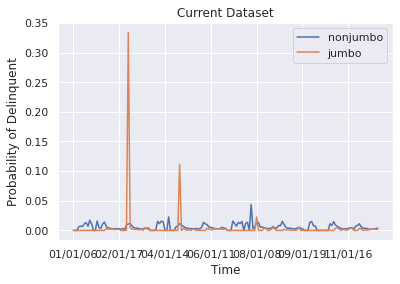

In [ ]:
# plot the P(DEL) for CUR Dataset
sns.set()  # use Seaborn styles
cur.pivot_table('p', index='Act_date', columns='flag', aggfunc='mean').replace(np.nan,0).plot()

plt.ylabel('Probability of Delinquent')
plt.xlabel('Time')
plt.title('Current Dataset')
plt.legend(labels=('nonjumbo','jumbo'))
plt.xlabel()

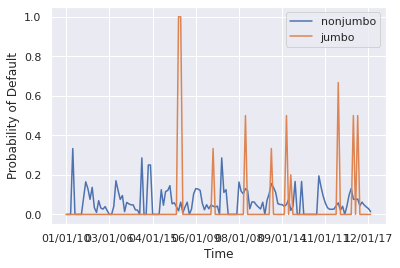

In [ ]:
# plot the P(SDQ) for DEL Dataset
sns.set()  # use Seaborn styles
de.pivot_table('p2', index='Act_date', columns='flag', aggfunc='mean').replace(np.nan,0).plot()
plt.ylabel('Probability of Default')
plt.xlabel('Time')
plt.legend(labels=('nonjumbo','jumbo'))

In [ ]:
#validation
jumbo = cur[cur['Orig_amt']>510400]
val_table = jumbo.groupby(['Act_date','Next_stat']).size().unstack()
print(val_table)

Next_stat     CUR  DEL   PPY  SDQ
Act_date                         
01/01/09      1.0  NaN   NaN  NaN
01/01/11      1.0  NaN   NaN  NaN
01/01/12      1.0  NaN   NaN  NaN
01/01/13      NaN  NaN   1.0  NaN
02/01/08      4.0  NaN   NaN  NaN
...           ...  ...   ...  ...
12/01/14   1236.0  2.0  67.0  NaN
12/01/15   1143.0  3.0  42.0  NaN
12/01/16   1071.0  3.0  41.0  NaN
12/01/17   1157.0  2.0  16.0  NaN
12/01/18   1069.0  2.0  21.0  NaN

[119 rows x 4 columns]
